### Twitter Web-Scraping + Sentiment Analysis + Visualizations ETL Pipeline

#### Necessary Imports

In [198]:
import pandas as pd # DataFrames
import numpy # Numerical Calculations
import os # operating system

# Data Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Smart Progress Meter
from tqdm.notebook import tqdm

# NLP
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Twitter WebScraper
import snscrape.modules.twitter as sntwitter

#### Function to Scrape Tweets into DataFrame + Vaders Sentiment Scores + Display and Save Visualizations

In [199]:
# Note: no @ before username

def scrape_and_sentiment_tweets(username):
    
    # Define twitter webscrpaer to scrape tweets from defined username
    scraper = sntwitter.TwitterSearchScraper(f'from:{username}')
    
    # Create list from iterated data with desired twitter data
    tweets = []
    for i, tweet in tqdm(enumerate(scraper.get_items())):
        data = [
            tweet.date,
            tweet.user.username,
            tweet.content,
            tweet.likeCount,
            tweet.retweetCount
            ]
        tweets.append(data)
    
    # Create pandas data frame from tweets list
    df = pd.DataFrame(tweets, columns=['date',
                                       'username',
                                       'content',
                                       'like_count',
                                       'retweet_count'])
    
    # Insert column with index values (used for later dataframe merging)
    df.insert(loc=0, column='index', value=[i for i in range(len(df))])
    
    # Define Vaders sentiment intensity analzer
    sia = SentimentIntensityAnalyzer()
    
    # Iterate through rows content, determining sentiment analysis for each tweet
    res = {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
        content = row['content']
        index = row['index']
        res[index] = sia.polarity_scores(content)
    vaders_df = pd.DataFrame(res).T
    vaders_df.insert(loc=0, column='index', value=[i for i in range(len(vaders_df))])
    
    # Merge vaders sentiment analysis scores onto tweets data frame
    df = df.merge(vaders_df, how="left")
    
    # Save pandas dataframe to csv
    data_dir = f'tweet_sentiment_data_{username}'
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    df.to_csv(data_dir+"//data.csv")

    
    ## Data Visualizations - display below and also save to data directory
    
    # Define Data Visualizations Directory to save visualizations 
    visualizations_dir = data_dir+'//visualizations//'
    if not os.path.exists(visualizations_dir):
        os.makedirs(visualizations_dir)
    
    # Pie Chart for Sentiment Score Distribution
    plt.figure(figsize=(8,5), dpi=100)
    data = [df['pos'].mean(),
            df['neu'].mean(),
            df['neg'].mean()]
    labels = ['Positive', 'Neutral', 'Negative']
    colors = ["Green", "Orange", "Red"]
    explode = (.03, .03, .03)
    plt.title(f"Vaders Sentiment Score Distribution \nfor all {username} tweets")
    plt.pie(data,
            labels = labels,
            colors = colors,
            explode = explode,
            pctdistance=0.7,
            autopct='%.1f%%')
    plt.savefig(visualizations_dir+"Sentiment_Pie.png")
    plt.show()
    
    # Pie Chart for Sentiment Score Distribution
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    sns.barplot(data=df,  y="pos", ax=axs[0], color="green")
    sns.barplot(data=df,  y="neu", ax=axs[1], color="orange")
    sns.barplot(data=df,  y="neg", ax=axs[2], color = "red")
    axs[0].set_title('Positive')
    axs[1].set_title('Neutral')
    axs[2].set_title('Negative')
    fig.suptitle(f"Vaders Sentiment Score Distribution for all {username} Tweets", fontsize=24)
    plt.tight_layout()
    plt.savefig(visualizations_dir+"Sentiment_Bar.png")
    plt.show()
    
    # Scatter Plot over time 
    ax = sns.relplot(data=df, x="date", y="compound").set(title="Vaders Compound Scores over Time")
    ax.set_xticklabels(rotation=45)
    plt.savefig(visualizations_dir+"Sentiment_Scatter_OverTime.png")
    plt.show()
    
    
    # Return DataFrame
    return df

0it [00:00, ?it/s]

  0%|          | 0/18570 [00:00<?, ?it/s]

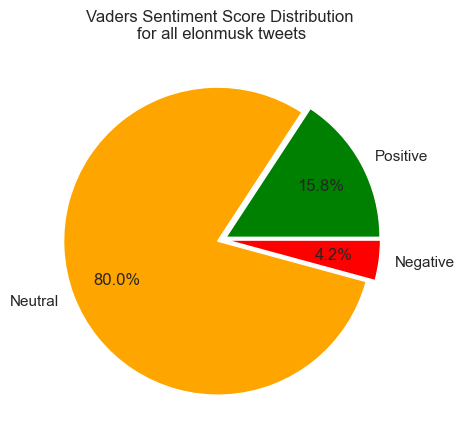

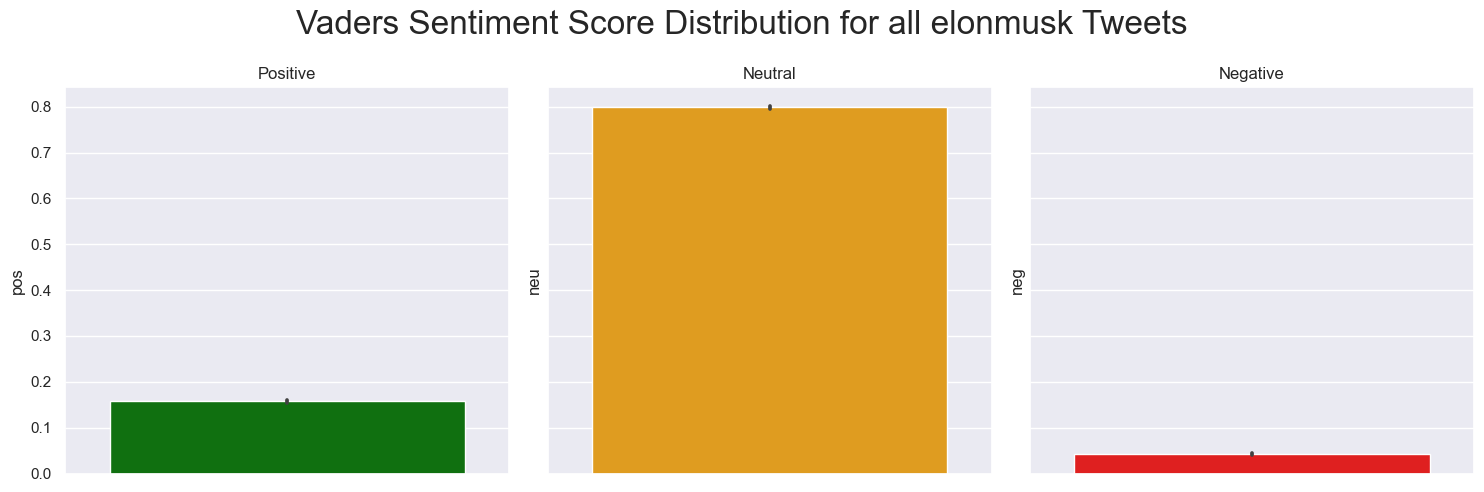

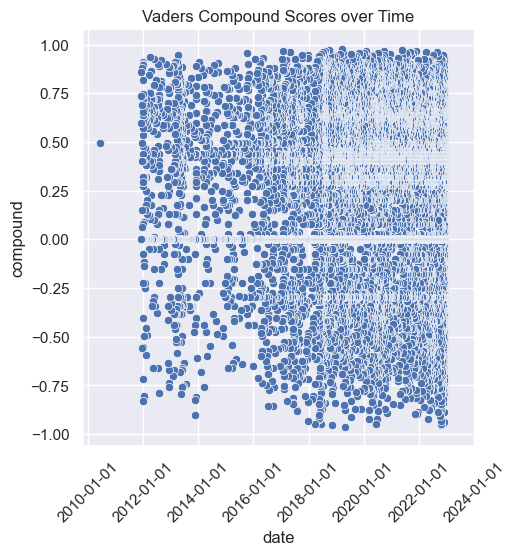

In [200]:
df = scrape_and_sentiment_tweets('elonmusk')

#### Print dataframe shape

In [201]:
df.shape

(18570, 10)

#### Display DataFrame Head

In [202]:
df.head()

,index,date,username,content,like_count,retweet_count,neg,neu,pos,compound
0,0,2022-12-05 21:22:43+00:00,elonmusk,@TrungTPhan Hmm,7006,280,0.0,1.000,0.000,0.0000
1,1,2022-12-05 18:59:37+00:00,elonmusk,So many interesting posts on Twitter these days!,242361,16095,0.0,0.682,0.318,0.5057
2,2,2022-12-05 18:48:15+00:00,elonmusk,@MarioNawfal Fixed,25848,887,0.0,1.000,0.000,0.0000
3,3,2022-12-05 18:47:09+00:00,elonmusk,@rookisaacman @engineers_feed X Æ A-12 Musk,4716,228,0.0,1.000,0.000,0.0000
4,4,2022-12-05 18:39:31+00:00,elonmusk,@RubinReport The ads are also way too big. We’...,54270,2325,0.0,1.000,0.000,0.0000


#### Display Dataframe Tail

In [203]:
df.tail()

,index,date,username,content,like_count,retweet_count,neg,neu,pos,compound
18565,18565,2011-12-03 08:22:07+00:00,elonmusk,That was a total non sequitur btw,142,15,0.000,1.000,0.000,0.0000
18566,18566,2011-12-03 08:20:28+00:00,elonmusk,"Great Voltaire quote, arguably better than Twa...",85,33,0.186,0.505,0.309,0.5994
18567,18567,2011-12-01 10:29:04+00:00,elonmusk,I made the volume on the Model S http://t.co/w...,76,12,0.000,1.000,0.000,0.0000
18568,18568,2011-12-01 09:55:11+00:00,elonmusk,Went to Iceland on Sat to ride bumper cars on ...,189,22,0.065,0.620,0.315,0.8588
18569,18569,2010-06-04 18:31:57+00:00,elonmusk,"Please ignore prior tweets, as that was someon...",6370,646,0.113,0.586,0.302,0.4939
